# AIN429 - ASSIGNMENT 

## Library Imports

The required libraries are downloaded in the cell below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

## Collecting The Data

I read csv file into pandas dataframe.

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


## Data Preprocessing 

In Data Preprocessing part, I made these operations respectively: <br>
- Print the length of data <br>
- Drop the first row because it is meaningless (full of zeros)
- Check the "?" values in data which have to be deleted <br>
- Drop columns with many "?", don't drop columns with less "?" to repair them (I dropped all columns after Z4)
- Replace "?" with NaN
- Change column types to 'float64' (some of them were object)
- Fill the NaN values with column mean <br>
- Check for duplicated rows (there were no duplicated rows) <br>
- Drop the outliers which are not in %25-%75 <br>

You can find all steps below.

In [3]:
print("Length of Data:", len(df))

Length of Data: 78096


In [4]:
df.drop(index=df.index[0], axis=0, inplace=True)
df.reset_index(drop = True)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78091,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78092,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78093,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


In [5]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


In [6]:
df[df == "?"].count()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [7]:
df = df.drop(['X5','Y5','Z5','X6','Y6','Z6','X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'], axis=1)
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993


In [8]:
df = df.replace("?", np.nan)

In [9]:
df[df == "?"].count()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
dtype: int64

In [10]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
dtype: object

In [11]:
for i in range(2,len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].astype('float64')
    mean=df[df.columns[i]].mean()
    df[df.columns[i]].fillna(value=mean, inplace=True)

In [12]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
dtype: object

In [13]:
df.isna().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
dtype: int64

In [14]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4


In [15]:
Q1 = df[2:None].quantile(0.25)
Q3 = df[2:None].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop = True)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76924,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.901940,98.056881,4.075018,26.030878,136.368236,-32.792393
76925,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.743924,104.726272,-53.007244,26.446943,135.823494,-33.851425
76926,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.225675,77.688911,-17.354844,26.506640,135.605903,-34.441463
76927,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.715915,135.523929,-34.675774,-22.329495,104.026431,-54.334623


In [16]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906


In [17]:
len(df) #nearly 2k column dropped

76929

## Data Visualization

Class and User graphs don't make much sense but we can see coordinate distrubiton from other graphs.

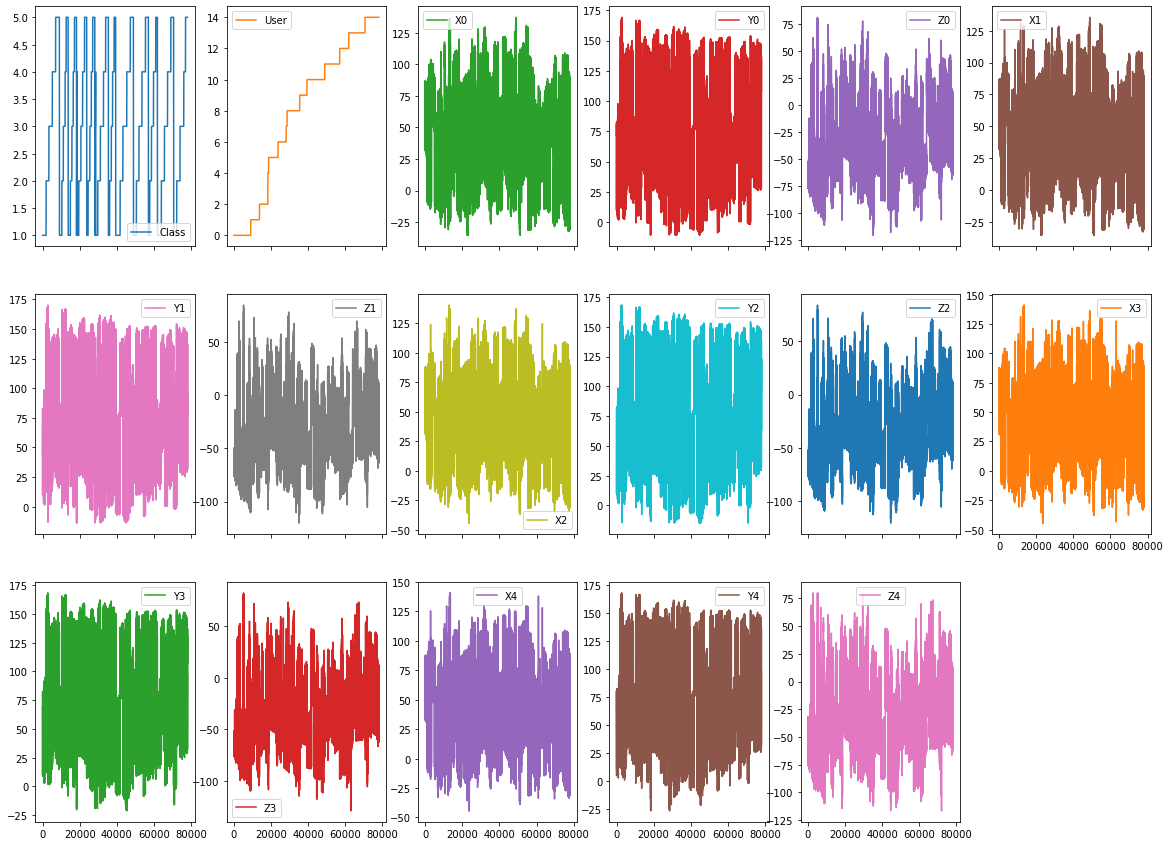

In [18]:
df.plot(subplots=True, layout=(3,6),figsize=(20,15))
plt.show()

This graph shows us outliers, mean, median etc. <br>
We don't see much outliers because I removed outliers in preprocessing part.

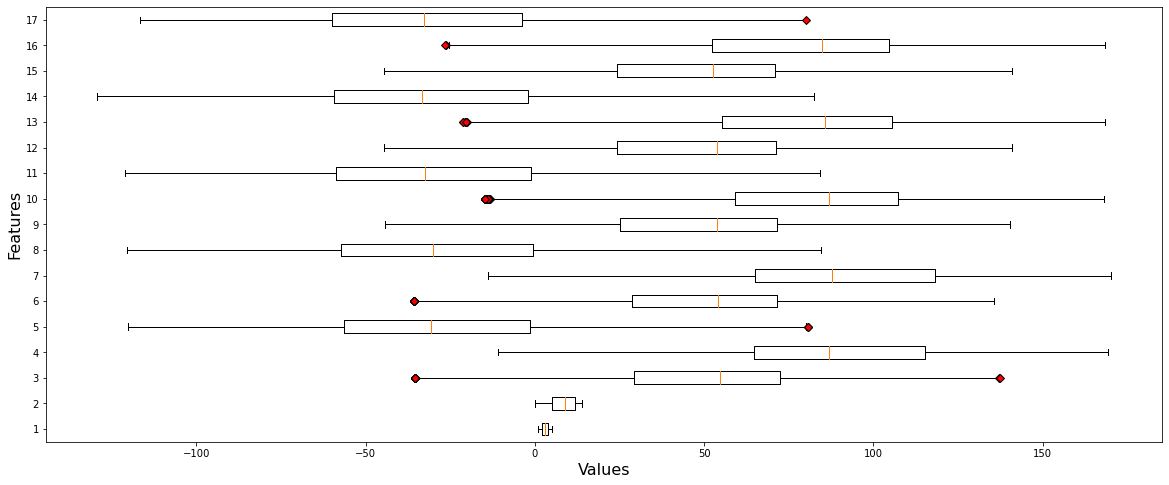

In [19]:
outlier_detection = dict(markerfacecolor='r', marker='D')
plt.subplots(figsize=(20, 8))
plt.boxplot(df,vert=False,flierprops=outlier_detection)
plt.xlabel("Values",Fontsize=16)
plt.ylabel("Features",Fontsize=16)
plt.show()

Heatmap of Class, User and degree 0 coordinates , just for presentation.

In [22]:
import plotly.express as px
fig = px.imshow(df[['Class','User','X0','Y0','Z0']].corr(),text_auto=True,title="Heatmap of Class & User & Coordinates-0")
fig.show()

## Classification 

For classification part I choosed 3 methods. These are: <br>
- Random Forest
- Decision Tree
- Gaussian Naive Bayes <br>

I splitted data into X_train, X_test, y_train, y_test with train_test_split method. I choosed train size as %80 and test size as %20. <br> 
y --> Class column of data <br>
X --> All columns without class column

In [23]:
y = df['Class']

In [24]:
df = df.drop(['Class'], axis=1)
X = df

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 1) Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
predRF = rf.predict(X_test)

### 2) Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predDT = dt.predict(X_test)

### 3) Gaussian Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predGNB = gnb.predict(X_test)

## Results & Analysis

After running the models, I represented results with table and graphs below.

In [32]:
accRF = round(accuracy_score(y_test, predRF),2)
accDT = round(accuracy_score(y_test, predDT),2)
accGNB = round(accuracy_score(y_test, predGNB),2)

#### Accuracy of Models

In [33]:
acc_list = [accRF, accDT, accGNB]
model_list = ["Random Forest", "Decision Tree", "Gaussian Naive Bayes"]

In [34]:
fig = go.Figure(data=[go.Table(header=dict(values=['Models', 'Accuracy Scores']),cells=dict(values=[model_list,acc_list]))])
fig.update_layout(width=900, height=400)
fig.show()

#### Classification Report and Confusion Matrix of Models

In [35]:
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

##### Random Forest 

In [36]:
print(classification_report(y_test, predRF, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.56      0.88      0.68      3177
     Class 2       0.55      0.83      0.66      2927
     Class 3       0.44      0.35      0.39      3202
     Class 4       0.67      0.05      0.09      2971
     Class 5       0.49      0.51      0.50      3109

    accuracy                           0.52     15386
   macro avg       0.54      0.52      0.47     15386
weighted avg       0.54      0.52      0.47     15386



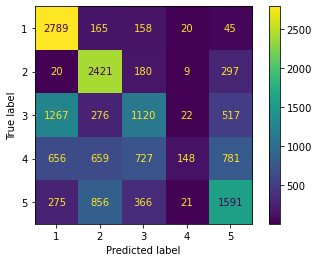

In [37]:
cmRF = confusion_matrix(y_test, predRF, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmRF,display_labels=rf.classes_)
disp.plot()
plt.show()

##### Decision Tree

In [38]:
print(classification_report(y_test, predDT, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.98      0.99      0.98      3177
     Class 2       0.93      0.92      0.92      2927
     Class 3       0.93      0.93      0.93      3202
     Class 4       0.90      0.91      0.91      2971
     Class 5       0.93      0.92      0.93      3109

    accuracy                           0.94     15386
   macro avg       0.94      0.94      0.94     15386
weighted avg       0.94      0.94      0.94     15386



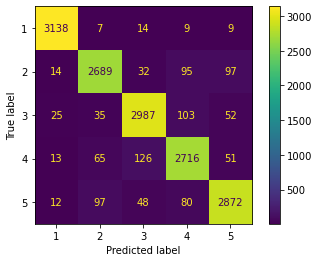

In [39]:
cmDT = confusion_matrix(y_test, predDT, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmDT,display_labels=dt.classes_)
disp.plot()
plt.show()

##### Gaussian Naive Bayes

In [40]:
print(classification_report(y_test, predGNB, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.87      0.93      0.90      3177
     Class 2       0.59      0.77      0.67      2927
     Class 3       0.62      0.69      0.65      3202
     Class 4       0.55      0.32      0.41      2971
     Class 5       0.72      0.65      0.68      3109

    accuracy                           0.68     15386
   macro avg       0.67      0.67      0.66     15386
weighted avg       0.67      0.68      0.66     15386



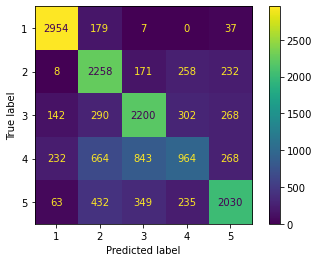

In [41]:
cmGNB = confusion_matrix(y_test, predGNB, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmGNB,display_labels=gnb.classes_)
disp.plot()
plt.show()

### Comparing Model Results

When we look at the graphs below, we can comment on success of models, and we can analize success class by class.

In [42]:
reportRF = classification_report(y_test, predRF, output_dict=True)
reportDT = classification_report(y_test, predDT, output_dict=True)
reportGNB = classification_report(y_test, predGNB, output_dict=True)

Decision Tree has a grand advantage against other models. It gives us 0.94 accuracy which is very successful.<br>
On the other hand, Gaussian Naive Bayes is better than Random Forest but result is mediocre.

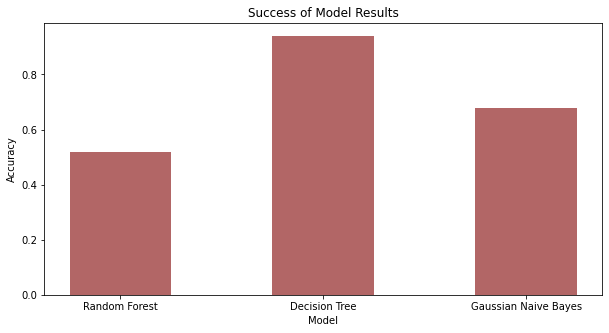

In [43]:
fig = plt.figure(figsize = (10, 5))
plt.bar(model_list, acc_list, color ='maroon',width = 0.5, alpha=0.6)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Success of Model Results")
plt.show()

I printed some graphs which are show precision, recall and F1-score of models for each class in the data. <br>
- Class 1
- Class 2
- Class 3
- Class 4
- Class 5

In [44]:
class1_data = [[reportRF['1']['precision'], reportRF['1']['recall'], reportRF['1']['f1-score']],[reportDT['1']['precision'], reportDT['1']['recall'], reportDT['1']['f1-score']],[reportGNB['1']['precision'], reportGNB['1']['recall'], reportGNB['1']['f1-score']]]
class2_data = [[reportRF['2']['precision'], reportRF['2']['recall'], reportRF['2']['f1-score']],[reportDT['2']['precision'], reportDT['2']['recall'], reportDT['2']['f1-score']],[reportGNB['2']['precision'], reportGNB['2']['recall'], reportGNB['2']['f1-score']]]
class3_data = [[reportRF['3']['precision'], reportRF['3']['recall'], reportRF['3']['f1-score']],[reportDT['3']['precision'], reportDT['3']['recall'], reportDT['3']['f1-score']],[reportGNB['3']['precision'], reportGNB['3']['recall'], reportGNB['3']['f1-score']]]
class4_data = [[reportRF['4']['precision'], reportRF['4']['recall'], reportRF['4']['f1-score']],[reportDT['4']['precision'], reportDT['4']['recall'], reportDT['4']['f1-score']],[reportGNB['4']['precision'], reportGNB['4']['recall'], reportGNB['4']['f1-score']]]
class5_data = [[reportRF['5']['precision'], reportRF['5']['recall'], reportRF['5']['f1-score']],[reportDT['5']['precision'], reportDT['5']['recall'], reportDT['5']['f1-score']],[reportGNB['5']['precision'], reportGNB['5']['recall'], reportGNB['5']['f1-score']]]
index = ['Precision','Recall','F1-score']

In [45]:
class1_df = pd.DataFrame(class1_data, columns = ['RF', 'DT', 'GNB'], index=index)
class2_df = pd.DataFrame(class2_data, columns = ['RF', 'DT', 'GNB'], index=index)
class3_df = pd.DataFrame(class3_data, columns = ['RF', 'DT', 'GNB'], index=index)
class4_df = pd.DataFrame(class4_data, columns = ['RF', 'DT', 'GNB'], index=index)
class5_df = pd.DataFrame(class5_data, columns = ['RF', 'DT', 'GNB'], index=index)

Text(0.5, 1.0, 'Class 1')

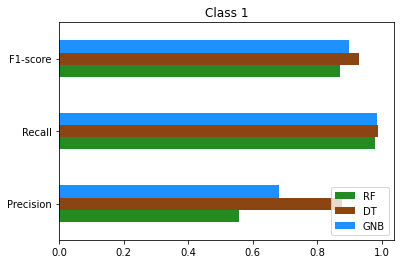

In [46]:
class1_df.plot.barh(color={"RF": "forestgreen", "DT": "saddlebrown","GNB":"dodgerblue"})
plt.title("Class 1")

Text(0.5, 1.0, 'Class 2')

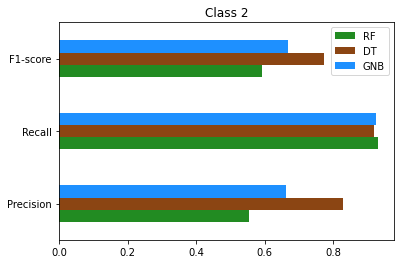

In [47]:
class2_df.plot.barh(color={"RF": "forestgreen", "DT": "saddlebrown","GNB":"dodgerblue"})
plt.title("Class 2")

Text(0.5, 1.0, 'Class 3')

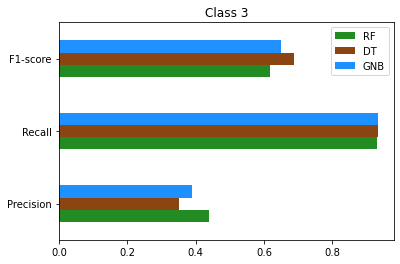

In [48]:
class3_df.plot.barh(color={"RF": "forestgreen", "DT": "saddlebrown","GNB":"dodgerblue"})
plt.title("Class 3")

Text(0.5, 1.0, 'Class 4')

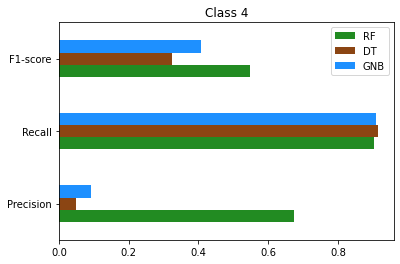

In [49]:
class4_df.plot.barh(color={"RF": "forestgreen", "DT": "saddlebrown","GNB":"dodgerblue"})
plt.title("Class 4")

Text(0.5, 1.0, 'Class 5')

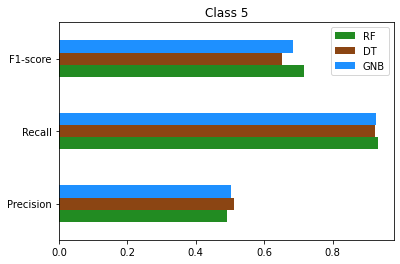

In [50]:
class5_df.plot.barh(color={"RF": "forestgreen", "DT": "saddlebrown","GNB":"dodgerblue"})
plt.title("Class 5")

## Conclusion

In this assignment, the aim was focus on classification methods. There are many classification methods. For this assignment, my first choice became Random Forest and Decision Tree because I worked with them mostly. After that I decided to implement Gaussian Naive Bayes to see it's performance. I started the work with general data preprocessing operations. After this operations data became ready to fit in classification models. I splitted data into %80 train and %20 test parts, because it's a classification problem. I had to find success of models so I run all models with same data. I had predictions and compared with actual values which is y_test.

When we talk about accuracies, Decision Tree is exactly best model for our data. It gives %94 accuracy and it means nearly perfect predictions. Gaussian Naive Bayes predicts a little better than Random Forest. <br> <br>
While looking at classes one by one, we can see that recall is always very close for each model.
Decision Tree dominates all classes but not Class 4. In some classes we can see Random Forest or Gaussian Naive Bayes may have good precision values.

Gaussian Naive Bayes in some classes have better F1-score than others.

Also Confusion Matrix of models shows that in which class, how many values predicted true.

## References

1) https://www.datacamp.com/blog/classification-machine-learning <br>
2) https://www.edureka.co/blog/classification-in-machine-learning/ <br>
3) https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning <br>
4) https://www.analyticsvidhya.com/blog/2021/09/a-complete-guide-to-understand-classification-in-machine-learning <br>
5) https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2 <br>
6) https://medium.com/analytics-vidhya/building-classification-model-with-pyth <br>